# Comparing 2 Morans Strategies

## Imports

In [21]:
import metab_iso_processing as processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Get Valid Metabs

In [22]:
# Create Processing Object
metab_processor = processing.MIProcessing(absolute_data_path = "/Users/ilangoldfein/Documents/generated-data", relative_data_path='brain-m0-no-log', morans_path = 'valid-metabs-brain-glucose.txt')

Initializing IsoLearner
Generate Filepath List Triggered


In [23]:
# Generate Metabs
valid_metabolites = metab_processor.generate_valid_metabs()

generate_valid_metabs triggered
map_poor_unlabeled_metabolites triggered
============> Valid Metabolites Calculated
good_metabs ['?-N-Acetylglucosamine', 'ADP', 'ADP-D-glucose', 'AMP', 'Anserine', 'Arachidic acid', 'CDP-choline', 'CTP', 'Carnosine', 'Chenodeoxycholic acid', 'D-Pantethine', 'Docosahexaenoic acid(DHA)', 'Glycodeoxycholic acid', 'Glycoursodeoxycholic acid', 'IDP', 'IMP', 'Inosine 5-triphosphate', 'Lithocholic acid', 'Melatonin', 'Myristic acid', 'N-Acetylaspartic acid', 'N-Acetylneuraminic acid', 'NAD+', 'NADH', 'O-Phosphorylethanolamine', 'O-acetyl-L-serine', 'Retinoic Acid', 'Ribothymidine', 'Taurodeoxycholic acid', 'Tricarballylic acid', 'UMP', "adenosine 5'-phosphosulfate", 'aspartate', 'citrate/isocitrate', 'dATP', 'dCTP', 'dGMP', 'dTTP', 'dUTP', 'deoxyribose-phosphate', 'dephospho-CoA', 'elcosapentaenoic acid', 'fructose-1-6-bisphosphate', 'glucose-1-phosphate', 'glutamate', 'glutathione', 'riboflavin', 'sn-glycerol-3-phosphate', 'taurine', 'trehalose-6-Phosphate']


## Get Valid Isos

In [24]:
# Create Processing Object
iso_processor = processing.MIProcessing(absolute_data_path = "/Users/ilangoldfein/Documents/generated-data", relative_data_path='brain-m0-no-log', morans_path = 'valid-isos-brain-glucose.txt')

Initializing IsoLearner
Generate Filepath List Triggered


In [25]:
# Generate Isos
valid_isos = iso_processor.generate_valid_metabs()

generate_valid_metabs triggered
map_poor_unlabeled_metabolites triggered
============> Valid Metabolites Calculated
good_metabs ['?-N-Acetylglucosamine m+04', '?-N-Acetylglucosamine m+08', 'ADP m+00', 'ADP m+04', 'ADP m+05', 'ADP m+06', 'ADP m+07', 'ADP m+08', 'ADP m+09', 'ADP m+10', 'AMP m+09', 'AMP m+10', 'Anserine m+04', 'Anserine m+06', 'Anserine m+07', 'Anserine m+08', 'Anserine m+09', 'Anserine m+10', 'Carnosine m+03', 'Carnosine m+04', 'Carnosine m+06', 'Carnosine m+07', 'Carnosine m+08', 'Carnosine m+09', 'Cyclic-ADP-ribose m+00', 'Cyclic-ADP-ribose m+03', 'Cyclic-ADP-ribose m+04', 'Cyclic-ADP-ribose m+05', 'Cyclic-ADP-ribose m+06', 'Cyclic-ADP-ribose m+07', 'Cyclic-ADP-ribose m+08', 'Cyclic-ADP-ribose m+09', 'Cyclic-ADP-ribose m+10', 'Cyclic-ADP-ribose m+11', 'Cyclic-ADP-ribose m+12', 'Cyclic-ADP-ribose m+13', 'Cyclic-ADP-ribose m+14', 'Cyclic-ADP-ribose m+15', 'Docosahexaenoic acid(DHA) m+03', 'Docosahexaenoic acid(DHA) m+04', 'Docosahexaenoic acid(DHA) m+05', 'Docosahexaenoi

## Good vs. Bad Isos Kept Per Metab

In [26]:
# List of GOOD Kept Isos
good_isos_kept = {}

# Loop through list of valid metabs
for metabolite in valid_metabolites:
    # Check if Iso name is in Metab
    count = sum(1 for iso in valid_isos if iso.startswith(metabolite + " m+"))
    # Add count to list
    good_isos_kept[metabolite] = count

In [36]:
good_isos_kept

{'?-N-Acetylglucosamine': 2,
 'ADP': 8,
 'ADP-D-glucose': 0,
 'AMP': 2,
 'Anserine': 6,
 'Arachidic acid': 0,
 'CDP-choline': 0,
 'CTP': 0,
 'Carnosine': 6,
 'Chenodeoxycholic acid': 0,
 'D-Pantethine': 0,
 'Docosahexaenoic acid(DHA)': 20,
 'Glycodeoxycholic acid': 0,
 'Glycoursodeoxycholic acid': 0,
 'IDP': 0,
 'IMP': 4,
 'Inosine 5-triphosphate': 0,
 'Lithocholic acid': 0,
 'Melatonin': 0,
 'Myristic acid': 0,
 'N-Acetylaspartic acid': 1,
 'N-Acetylneuraminic acid': 6,
 'NAD+': 0,
 'NADH': 0,
 'O-Phosphorylethanolamine': 1,
 'O-acetyl-L-serine': 0,
 'Retinoic Acid': 0,
 'Ribothymidine': 4,
 'Taurodeoxycholic acid': 23,
 'Tricarballylic acid': 0,
 'UMP': 2,
 "adenosine 5'-phosphosulfate": 0,
 'aspartate': 0,
 'citrate/isocitrate': 0,
 'dATP': 0,
 'dCTP': 0,
 'dGMP': 2,
 'dTTP': 0,
 'dUTP': 0,
 'deoxyribose-phosphate': 0,
 'dephospho-CoA': 0,
 'elcosapentaenoic acid': 0,
 'fructose-1-6-bisphosphate': 3,
 'glucose-1-phosphate': 0,
 'glutamate': 0,
 'glutathione': 3,
 'riboflavin': 0,
 '

In [37]:
# Get every Iso
all_isos = iso_processor.get_all_metabs()

In [38]:
# List of ALL Kept Isos
all_isos_kept = {}

for metabolite in valid_metabolites:
    # Check if Iso name is in Metab
    count = sum(1 for iso in all_isos[0] if iso.startswith(metabolite + " m+"))
    # Add count to list
    all_isos_kept[metabolite] = count

In [39]:
all_isos_kept

{'?-N-Acetylglucosamine': 9,
 'ADP': 11,
 'ADP-D-glucose': 17,
 'AMP': 11,
 'Anserine': 11,
 'Arachidic acid': 21,
 'CDP-choline': 15,
 'CTP': 10,
 'Carnosine': 10,
 'Chenodeoxycholic acid': 25,
 'D-Pantethine': 23,
 'Docosahexaenoic acid(DHA)': 23,
 'Glycodeoxycholic acid': 27,
 'Glycoursodeoxycholic acid': 27,
 'IDP': 11,
 'IMP': 11,
 'Inosine 5-triphosphate': 8,
 'Lithocholic acid': 25,
 'Melatonin': 14,
 'Myristic acid': 15,
 'N-Acetylaspartic acid': 7,
 'N-Acetylneuraminic acid': 12,
 'NAD+': 22,
 'NADH': 22,
 'O-Phosphorylethanolamine': 3,
 'O-acetyl-L-serine': 6,
 'Retinoic Acid': 21,
 'Ribothymidine': 11,
 'Taurodeoxycholic acid': 24,
 'Tricarballylic acid': 7,
 'UMP': 10,
 "adenosine 5'-phosphosulfate": 11,
 'aspartate': 5,
 'citrate/isocitrate': 7,
 'dATP': 10,
 'dCTP': 10,
 'dGMP': 11,
 'dTTP': 11,
 'dUTP': 10,
 'deoxyribose-phosphate': 6,
 'dephospho-CoA': 22,
 'elcosapentaenoic acid': 20,
 'fructose-1-6-bisphosphate': 7,
 'glucose-1-phosphate': 7,
 'glutamate': 6,
 'glutat

In [40]:
# Generate list of bad Isos that have been kept by finding the difference between the ALL list and GOOD list
bad_isos_kept = {metabolite: all_isos_kept[metabolite] - good_isos_kept[metabolite] for metabolite in all_isos_kept}

In [41]:
bad_isos_kept

{'?-N-Acetylglucosamine': 7,
 'ADP': 3,
 'ADP-D-glucose': 17,
 'AMP': 9,
 'Anserine': 5,
 'Arachidic acid': 21,
 'CDP-choline': 15,
 'CTP': 10,
 'Carnosine': 4,
 'Chenodeoxycholic acid': 25,
 'D-Pantethine': 23,
 'Docosahexaenoic acid(DHA)': 3,
 'Glycodeoxycholic acid': 27,
 'Glycoursodeoxycholic acid': 27,
 'IDP': 11,
 'IMP': 7,
 'Inosine 5-triphosphate': 8,
 'Lithocholic acid': 25,
 'Melatonin': 14,
 'Myristic acid': 15,
 'N-Acetylaspartic acid': 6,
 'N-Acetylneuraminic acid': 6,
 'NAD+': 22,
 'NADH': 22,
 'O-Phosphorylethanolamine': 2,
 'O-acetyl-L-serine': 6,
 'Retinoic Acid': 21,
 'Ribothymidine': 7,
 'Taurodeoxycholic acid': 1,
 'Tricarballylic acid': 7,
 'UMP': 8,
 "adenosine 5'-phosphosulfate": 11,
 'aspartate': 5,
 'citrate/isocitrate': 7,
 'dATP': 10,
 'dCTP': 10,
 'dGMP': 9,
 'dTTP': 11,
 'dUTP': 10,
 'deoxyribose-phosphate': 6,
 'dephospho-CoA': 22,
 'elcosapentaenoic acid': 20,
 'fructose-1-6-bisphosphate': 4,
 'glucose-1-phosphate': 7,
 'glutamate': 6,
 'glutathione': 8,


## Plotting

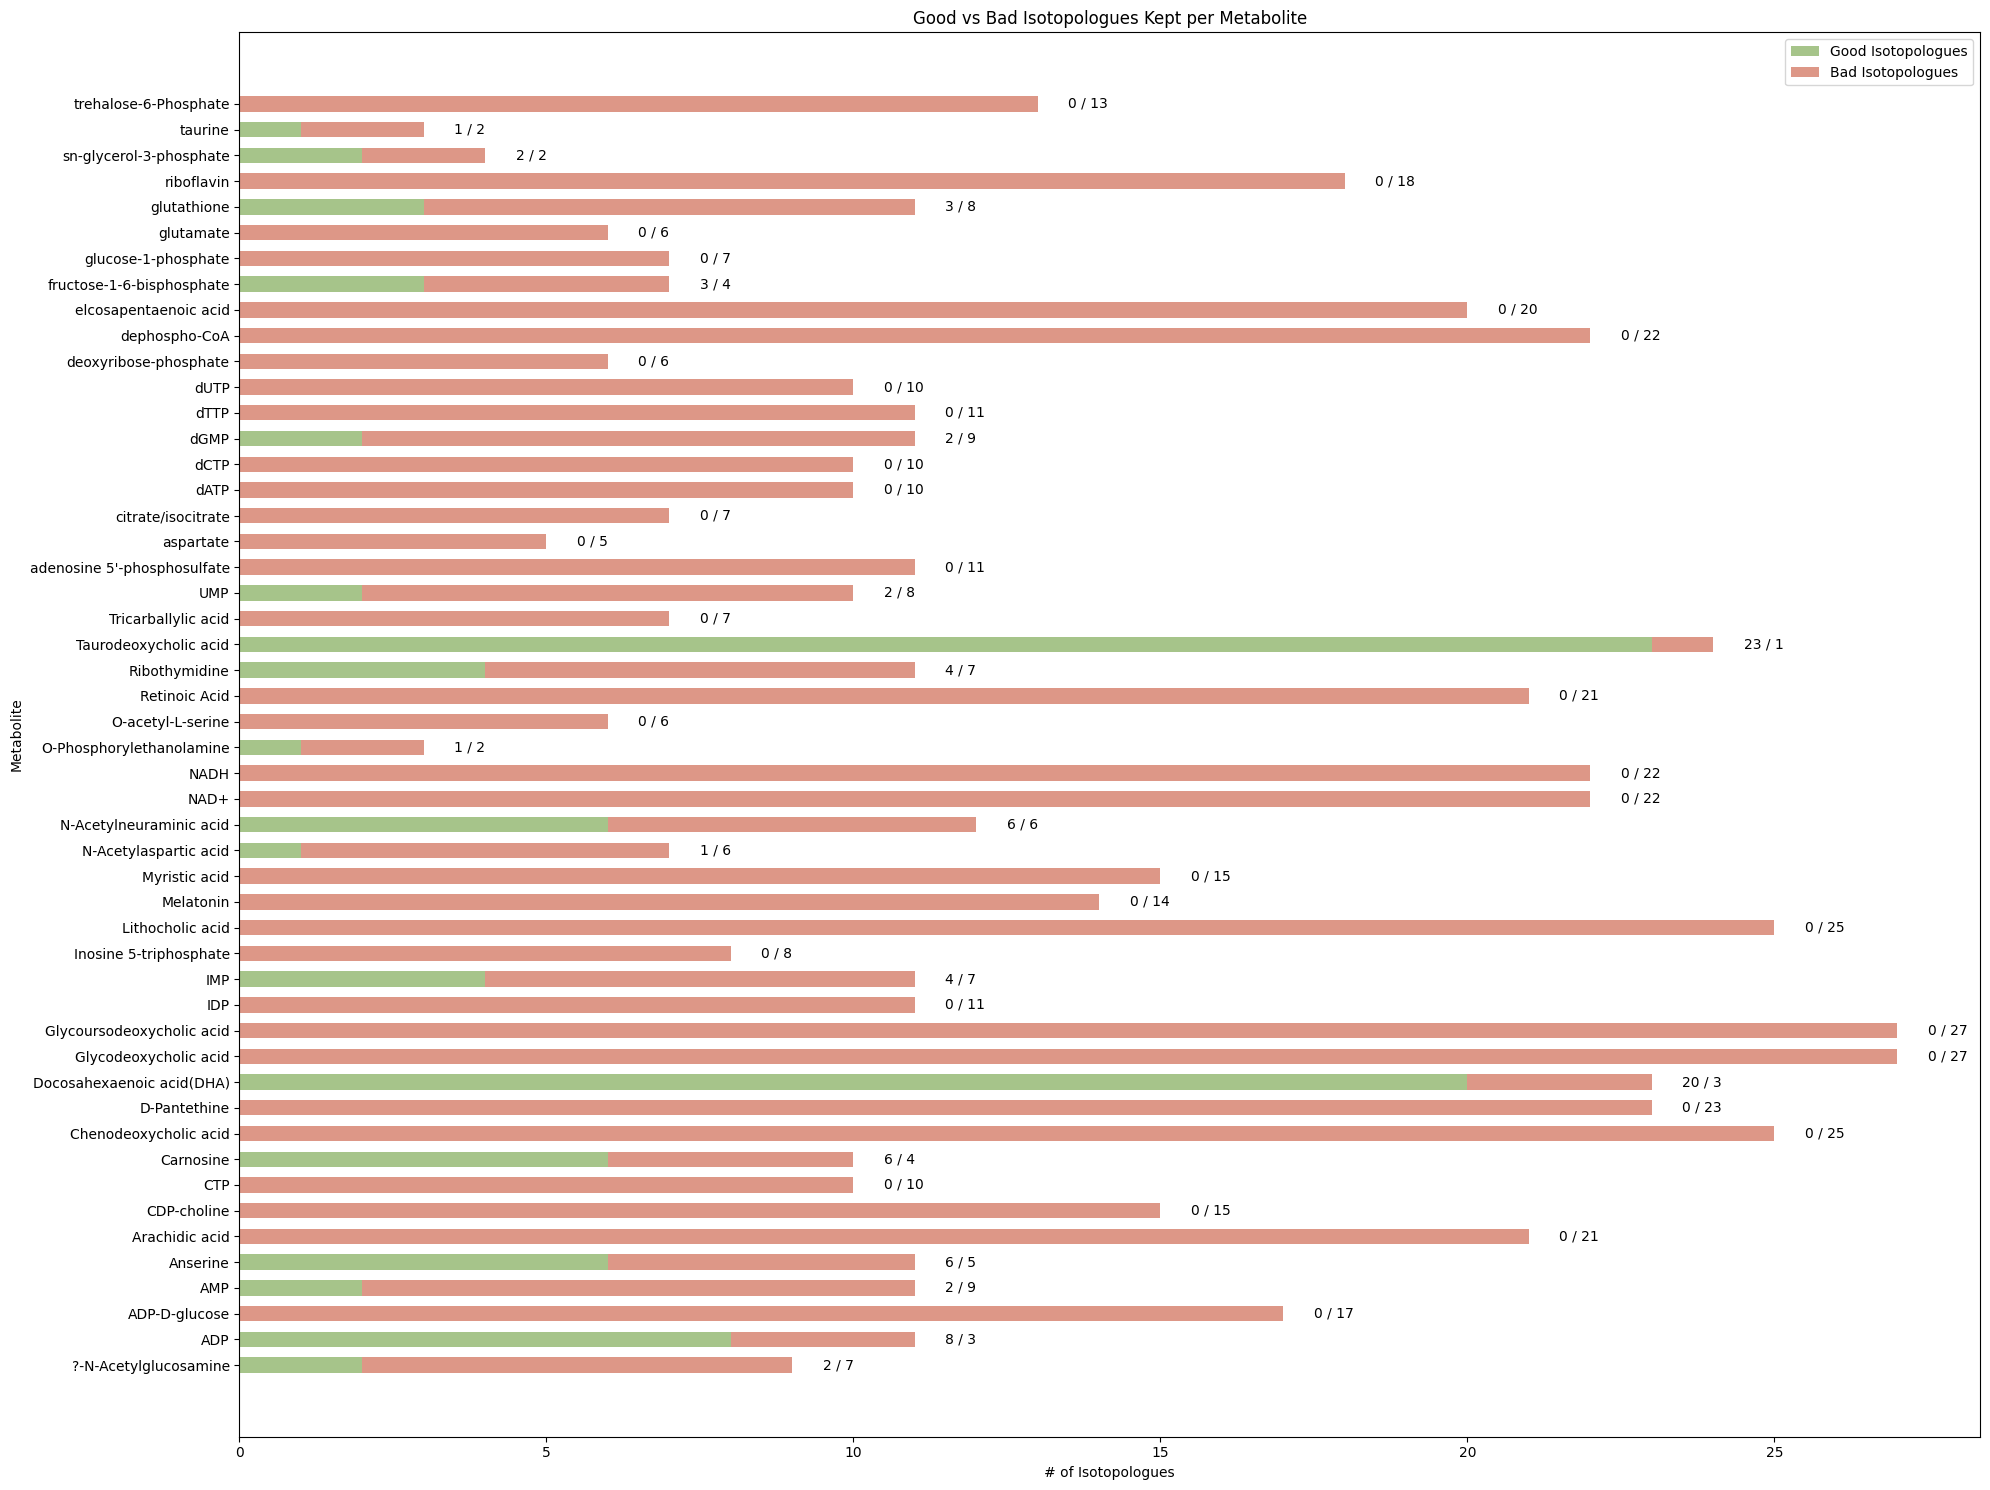

In [42]:
bar_width = 0.6
index = range(len(all_isos_kept))

fig, ax = plt.subplots(figsize=(20, 15))

bar1 = ax.barh(index, good_isos_kept.values(), bar_width, label='Good Isotopologues', color='#A6C48A')
bar2 = ax.barh(index, bad_isos_kept.values(), bar_width, left=list(good_isos_kept.values()), label='Bad Isotopologues', color='#DD9787')

for i, (good, bad) in enumerate(zip(good_isos_kept.values(), bad_isos_kept.values())):
    ax.text(good + bad + 0.5, i, f"{good} / {bad}", va='center')

ax.set_ylabel('Metabolite')
ax.set_xlabel('# of Isotopologues')
ax.set_title('Good vs Bad Isotopologues Kept per Metabolite')
ax.set_yticks(index)
ax.set_yticklabels(all_isos_kept.keys())
ax.legend()

plt.tight_layout()
plt.show()

## Good vs. Bad Isos Thrown Out Per Metab

In [43]:
# Get all Metabs
all_metabs = metab_processor.get_all_metabs()[0]

In [45]:
# Create list of invald metabs
invalid_metabs = []

# Loop through all metabs
for metab in all_metabs:
    # If Metab is not in list of valid metabs, append it to list of invalid metabs
    if metab not in valid_metabolites:
        invalid_metabs.append(metab)


In [61]:
# Print length of lists
print(len(all_metabs))
print(len(invalid_metabs))

348
298


In [78]:
# Get list of all Isos
all_isos = iso_processor.get_all_metabs()[0]

In [79]:
all_isos

['Glyoxylic acid m+00',
 'Glyoxylic acid m+01',
 'Glyoxylic acid m+02',
 'Glycolamide m+00',
 'Glycolamide m+01',
 'Glycolamide m+02',
 'glycine m+00',
 'glycine m+01',
 'glycine m+02',
 'Trimethylamine N-oxide m+00',
 'Trimethylamine N-oxide m+01',
 'Trimethylamine N-oxide m+02',
 'Trimethylamine N-oxide m+03',
 'Glycocholic acid m+00',
 'Glycocholic acid m+01',
 'Glycocholic acid m+02',
 'Glycocholic acid m+03',
 'Glycocholic acid m+04',
 'Glycocholic acid m+05',
 'Glycocholic acid m+06',
 'Glycocholic acid m+07',
 'Glycocholic acid m+08',
 'Glycocholic acid m+09',
 'Glycocholic acid m+10',
 'Glycocholic acid m+11',
 'Glycocholic acid m+12',
 'Glycocholic acid m+13',
 'Glycocholic acid m+14',
 'Glycocholic acid m+15',
 'Glycocholic acid m+16',
 'Glycocholic acid m+17',
 'Glycocholic acid m+18',
 'Glycocholic acid m+19',
 'Glycocholic acid m+20',
 'Glycocholic acid m+21',
 'Glycocholic acid m+22',
 'Glycocholic acid m+23',
 'Glycocholic acid m+24',
 'Glycocholic acid m+25',
 'Glycocho

In [49]:
# Create list of invalid isos
invalid_isos = []

# Loop through all isos
for iso in all_isos:
    # If the Iso is not in valid isos, append it to list of invalid isos
    if iso not in valid_isos:
        invalid_isos.append(iso)

In [60]:
# Print length of lists
print(len(all_isos))
print(len(invalid_isos))

3240
3128


In [64]:
# Create dict for bad isos that were dropped
bad_isos_dropped = {}

# Loop through INVALID metabs
for metabolite in invalid_metabs:
    # If a bad iso is in a bad metab, append to dict
    count = sum(1 for iso in invalid_isos if iso.startswith(metabolite + " m+"))
    bad_isos_dropped[metabolite] = count

In [66]:
# Create dict for all dropped Isos
all_isos_dropped = {}

# Loop throigh INVALID metabs
for metabolite in invalid_metabs:
    # If ANY is in a bad metab, append it to list
    count = sum(1 for iso in all_isos if iso.startswith(metabolite + " m+"))
    all_isos_dropped[metabolite] = count

In [68]:
# Take difference between ALL isos dropped and BAD isos dropped to get GOOD isos dropped
good_isos_dropped = {metabolite: all_isos_dropped[metabolite] - bad_isos_dropped[metabolite] for metabolite in all_isos_dropped}

In [69]:
good_isos_dropped

{'Glyoxylic acid': 0,
 'Glycolamide': 0,
 'glycine': 0,
 'Trimethylamine N-oxide': 0,
 'Glycocholic acid': 0,
 'Glycolic acid': 0,
 'Cysteamine': 0,
 'pyruvate': 0,
 'alanine': 0,
 'lactate': 0,
 '2-hydroxypyridine': 0,
 'Tiglic acid': 0,
 'acetoacetate': 0,
 '2-Ketobutyric acid': 0,
 'Isovaleric acid': 0,
 'dimethylglycine': 0,
 'Malonic acid': 0,
 '2-Hydroxybutyric acid': 0,
 'serine': 0,
 'Diethanolamine': 0,
 'glycerate': 0,
 'p-Benzoquinone': 0,
 'o-Cresol': 0,
 'Hypotaurine': 0,
 'Hydroquinone': 0,
 'cytosine': 0,
 'Histamine': 0,
 '3-Furoic acid': 0,
 'uracil': 0,
 'Creatinine': 0,
 'Dihydrouracil': 0,
 'proline': 0,
 'fumarate': 0,
 '2-Oxoisopentanoic acid': 0,
 '4-Methylvaleric acid': 0,
 'N-Acetylglycine': 0,
 'Guanidoacetic acid': 0,
 'indole': 0,
 'betaine': 0,
 'succinate': 0,
 '2-Hydroxyvaleric acid': 0,
 'Aminomalonic acid': 0,
 'homoserine': 0,
 'purine': 0,
 'cysteine': 0,
 'Benzoic acid': 0,
 'nicotinamide': 0,
 'nicotinate': 0,
 'Guaiacol': 0,
 '5-Methylcytosine': 0,

## Plotting

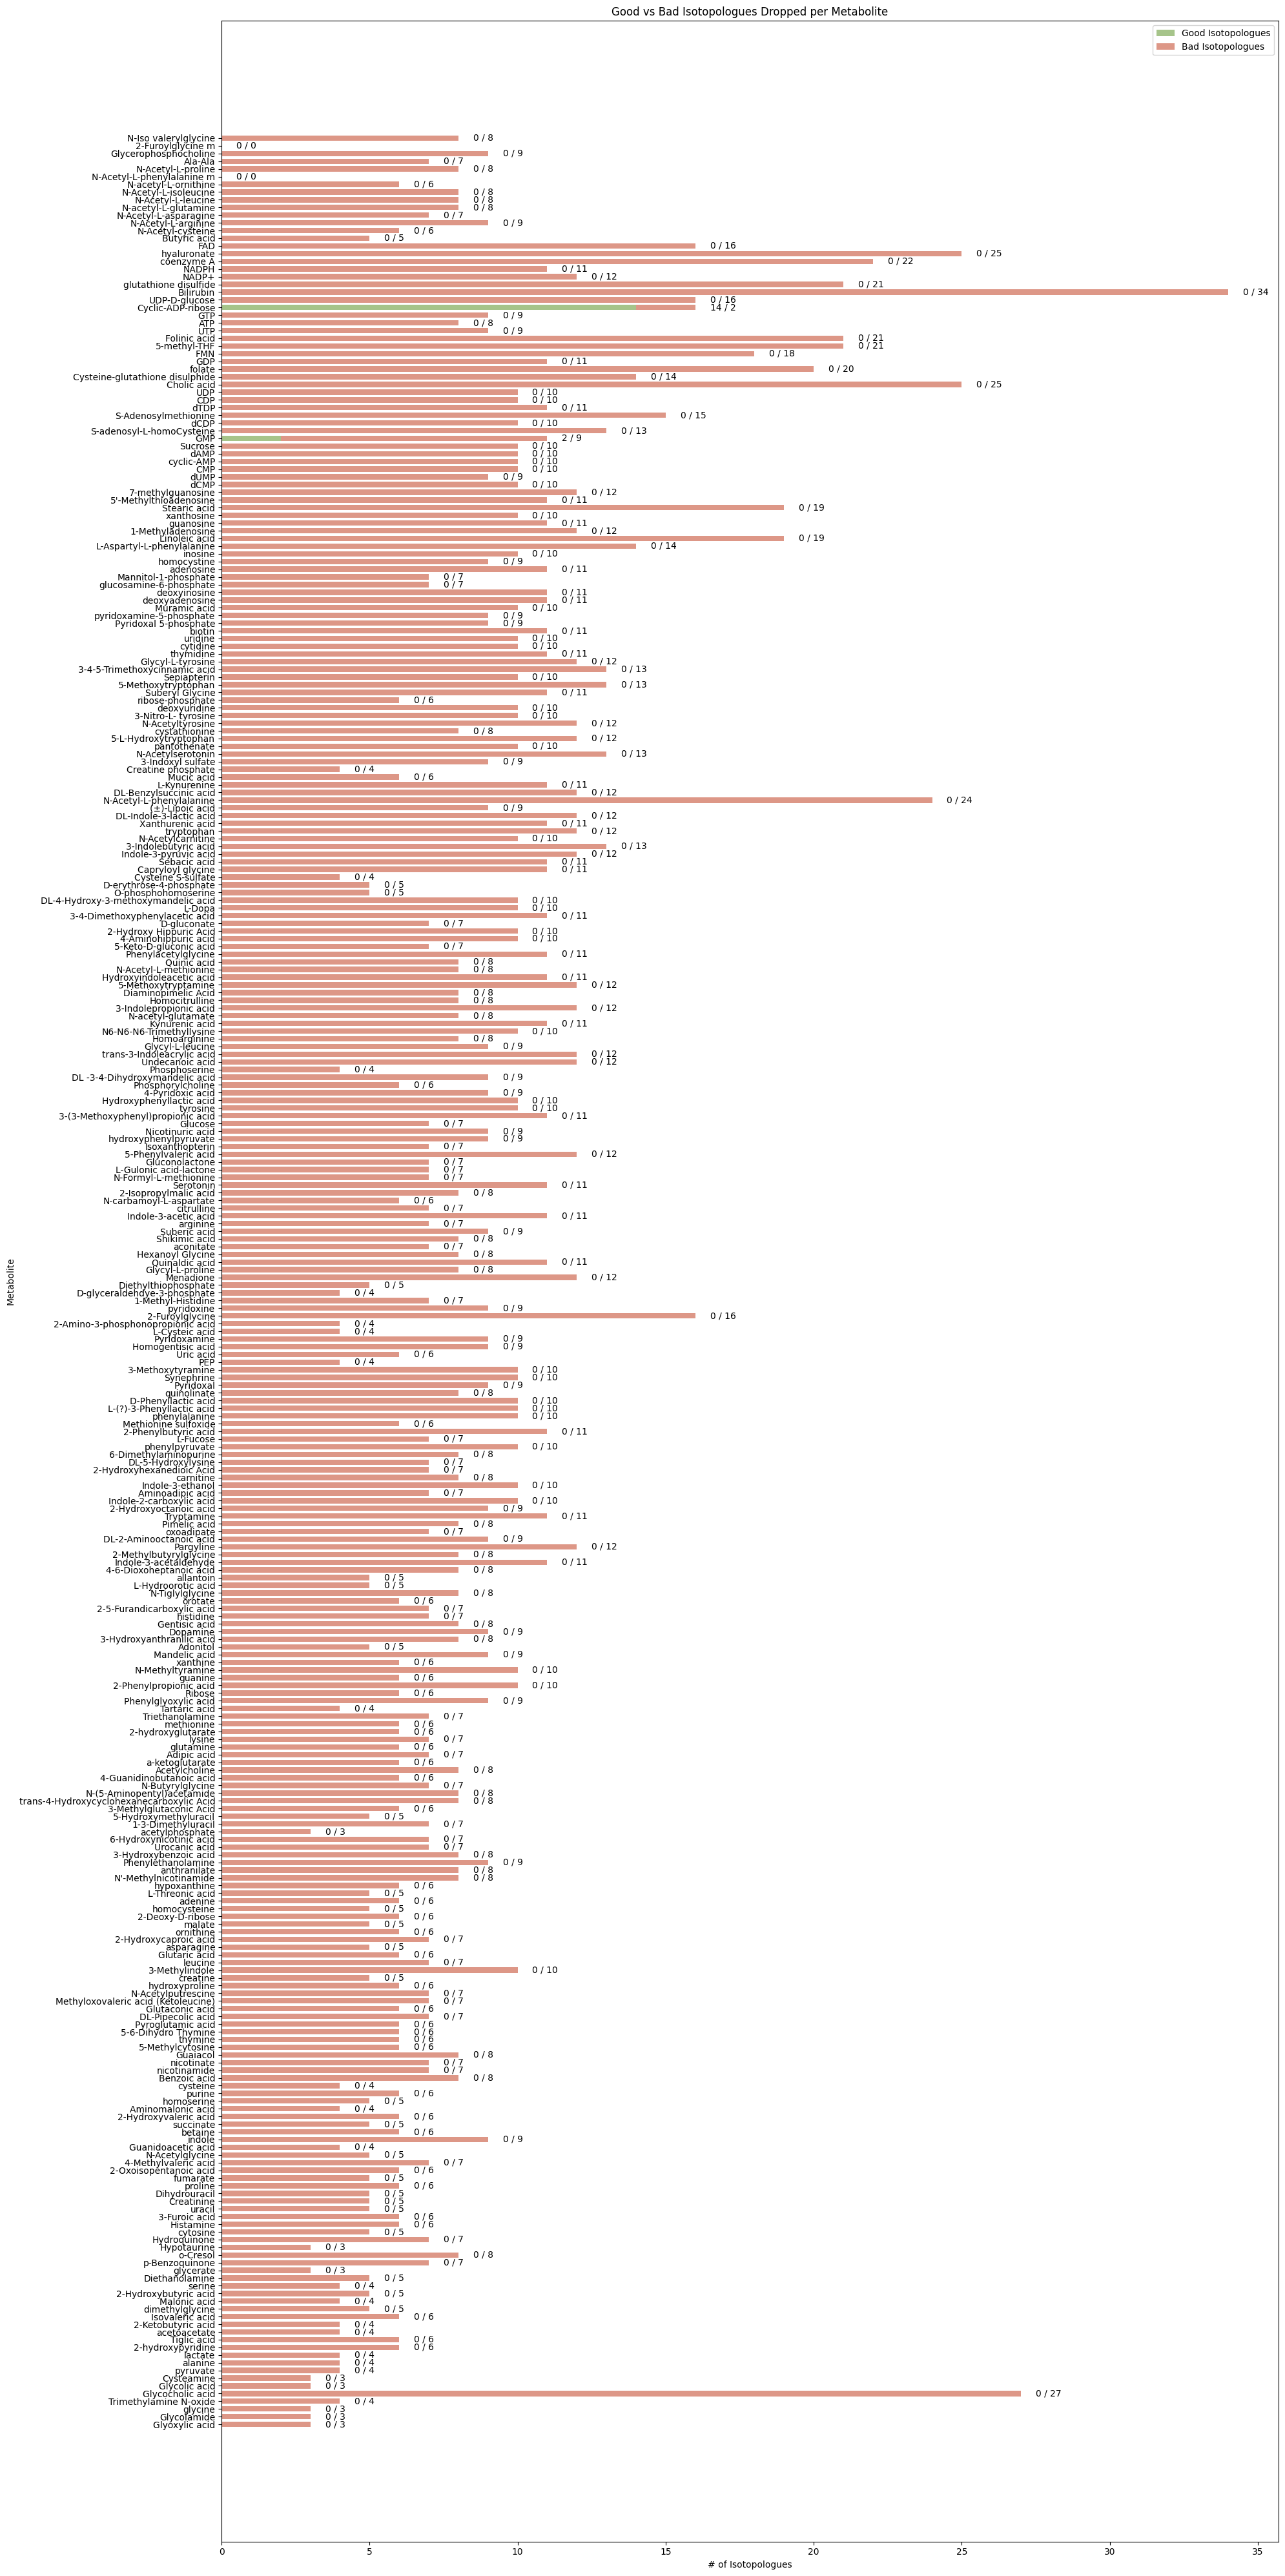

In [70]:
bar_width = 0.7
index = range(len(all_isos_dropped))

fig, ax = plt.subplots(figsize=(20, 40))

bar1 = ax.barh(index, good_isos_dropped.values(), bar_width, label='Good Isotopologues', color='#A6C48A')
bar2 = ax.barh(index, bad_isos_dropped.values(), bar_width, left=list(good_isos_dropped.values()), label='Bad Isotopologues', color='#DD9787')

for i, (good, bad) in enumerate(zip(good_isos_dropped.values(), bad_isos_dropped.values())):
    ax.text(good + bad + 0.5, i, f"{good} / {bad}", va='center')

ax.set_ylabel('Metabolite')
ax.set_xlabel('# of Isotopologues')
ax.set_title('Good vs Bad Isotopologues Dropped per Metabolite')
ax.set_yticks(index)
ax.set_yticklabels(all_isos_dropped.keys())
ax.legend()

plt.tight_layout()
plt.show()

## Issues

Figure out why 'N-Acetyl-L-phenylalanine m'  '2-Furoylglycine m' both have' a trailing m. Is that what is messing up their bars??